In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
def myplot(df):
    xClm="count_sim"
    yClm="count_real"
    plt.figure(figsize=(8,8))
    sns.regplot(xClm,yClm,data=df,fit_reg=False)
    plt.plot([0,6],[0,6],"k:")
    plt.xlim([0,2.7])
    plt.ylim([0,2.7])
    plt.xlabel("")
    plt.ylabel("")
    plt.tick_params(labelsize=15)
    plt.show()

In [2]:
countFilepath="summarize_count.csv"
count_df=pd.read_csv(countFilepath)
count_df.head()

,taxid,count_real,count_sim
0,429572,0.425893,0.427635
1,1434120,0.463257,0.442056
2,188937,0.448898,0.429019
3,1054217,1.094285,0.843878
4,1434123,0.410412,0.401882


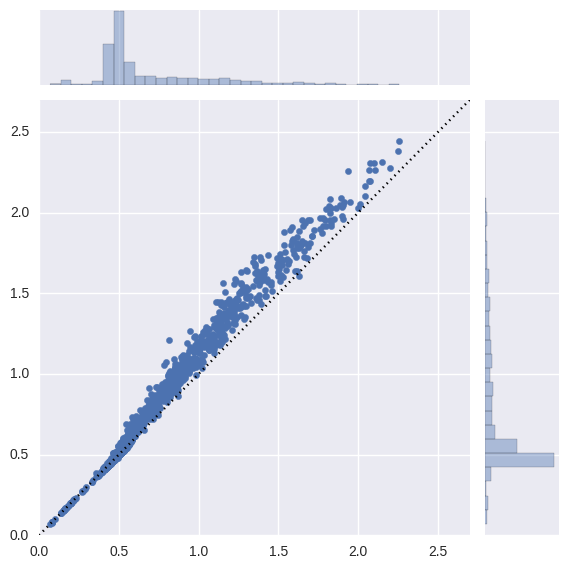

In [3]:
xClm="count_sim"
yClm="count_real"
g=sns.jointplot(xClm, yClm, data=count_df,stat_func=None)
g.ax_joint.plot(range(7), ':k')
g.ax_joint.set_xlim([0,2.7])
g.ax_joint.set_ylim([0,2.7])
g.ax_joint.set_xlabel("")
g.ax_joint.set_ylabel("")

#g.set(xlabel="",ylabel="")
plt.show()

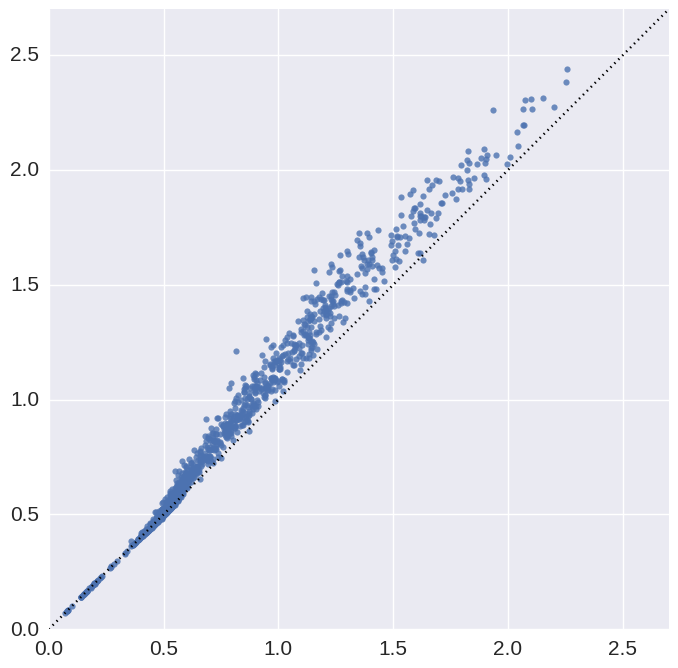

In [10]:
myplot(count_df)

In [5]:
lookupFilepath="../speciespick/picked_assembly_summary_code.csv"
lookup_df=pd.read_csv(lookupFilepath)
lookup_df.head()

,asm_name,assembly_accession,domain,ftp_basename,ftp_path,organism_name,taxid,genetic_code
0,ASM2238v1,GCF_000022385.1,archaea,GCF_000022385.1_ASM2238v1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Sulfolobus islandicus L.S.2.15,429572,11
1,ASM97008v1,GCF_000970085.1,archaea,GCF_000970085.1_ASM97008v1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Methanosarcina siciliae T4/M,1434120,11
2,ASM734v1,GCF_000007345.1,archaea,GCF_000007345.1_ASM734v1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Methanosarcina acetivorans C2A,188937,11
3,ASM35030v1,GCF_000350305.1,archaea,GCF_000350305.1_ASM35030v1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Thermoplasmatales archaeon BRNA1,1054217,11
4,ASM96990v1,GCF_000969905.1,archaea,GCF_000969905.1_ASM96990v1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Methanosarcina vacuolata Z-761,1434123,11


In [6]:
compFilepath="../preprocess/out/summary_composition.csv"
comp_df=pd.read_csv(compFilepath)
comp_df.head()

,ftp_basename,dna_type,G+C,num_ambiguous,per_ambiguous,A,C,G,T,B,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,GCF_000022385.1_ASM2238v1,chromosome,0.351110,0,0.0,888038,475131,485602,887501,NaN,...,14898,59802,45239,25365,35234,33745,95524,58476,47604,96167
1,GCF_000970085.1_ASM97008v1,chromosome,0.429404,0,0.0,1420708,1073050,1081510,1442290,NaN,...,52223,96142,93249,75156,63340,72350,91433,129173,89002,192140
2,GCF_000007345.1_ASM734v1,chromosome,0.426809,0,0.0,1638004,1228410,1226378,1658700,NaN,...,60400,112816,108481,86152,72519,82104,104484,149528,102469,220277
3,GCF_000350305.1_ASM35030v1,chromosome,0.583030,0,0.0,306724,427580,424288,302513,NaN,...,37083,22944,22468,21107,24589,17132,5507,26971,14986,9466
4,GCF_000969905.1_ASM96990v1,chromosome,0.397795,0,0.0,1340341,902862,889505,1373044,NaN,...,39862,94306,85991,64803,56747,65669,99640,117838,85862,191079


In [7]:
tmp_df=pd.merge(count_df, lookup_df, on="taxid",how="left")
tmp_df=tmp_df[list(count_df.columns)+["organism_name","ftp_basename","domain","genetic_code"]]
tmp_df=tmp_df[tmp_df["genetic_code"]==11]#!!!TBI!!! failed to handle genetic code=4 for now
tmp_df.head()

,taxid,count_real,count_sim,organism_name,ftp_basename,domain,genetic_code
0,429572,0.425893,0.427635,Sulfolobus islandicus L.S.2.15,GCF_000022385.1_ASM2238v1,archaea,11
1,1434120,0.463257,0.442056,Methanosarcina siciliae T4/M,GCF_000970085.1_ASM97008v1,archaea,11
2,188937,0.448898,0.429019,Methanosarcina acetivorans C2A,GCF_000007345.1_ASM734v1,archaea,11
3,1054217,1.094285,0.843878,Thermoplasmatales archaeon BRNA1,GCF_000350305.1_ASM35030v1,archaea,11
4,1434123,0.410412,0.401882,Methanosarcina vacuolata Z-761,GCF_000969905.1_ASM96990v1,archaea,11


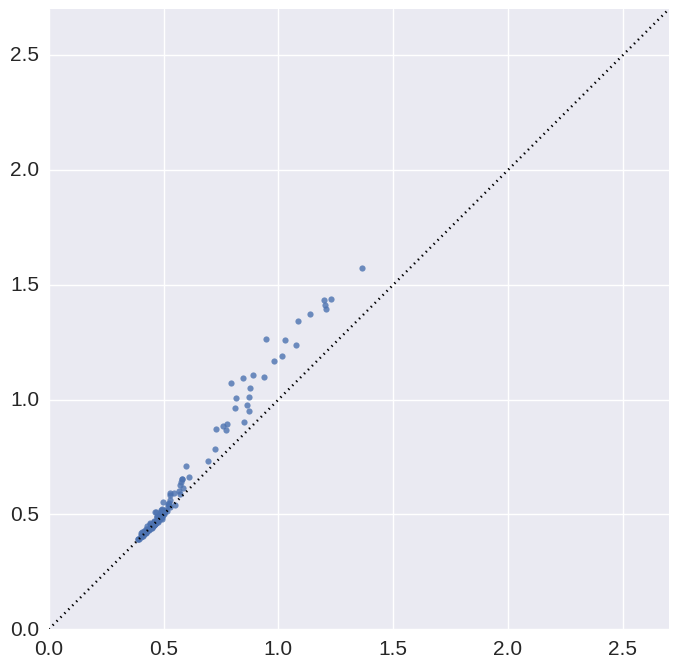

In [9]:
myplot(tmp_df[tmp_df["domain"]=="archaea"])

In [12]:
out_df=pd.merge(tmp_df, comp_df, on="ftp_basename", how="left")
out_df=out_df[list(tmp_df.columns)+["G+C"]]
out_df.head()

,taxid,count_real,count_sim,organism_name,ftp_basename,domain,genetic_code,G+C
0,429572,0.425893,0.427635,Sulfolobus islandicus L.S.2.15,GCF_000022385.1_ASM2238v1,archaea,11,0.351110
1,1434120,0.463257,0.442056,Methanosarcina siciliae T4/M,GCF_000970085.1_ASM97008v1,archaea,11,0.429404
2,188937,0.448898,0.429019,Methanosarcina acetivorans C2A,GCF_000007345.1_ASM734v1,archaea,11,0.426809
3,1054217,1.094285,0.843878,Thermoplasmatales archaeon BRNA1,GCF_000350305.1_ASM35030v1,archaea,11,0.583030
4,1434123,0.410412,0.401882,Methanosarcina vacuolata Z-761,GCF_000969905.1_ASM96990v1,archaea,11,0.397795


In [13]:
out_df["diff"]=out_df["count_real"]-out_df["count_sim"]

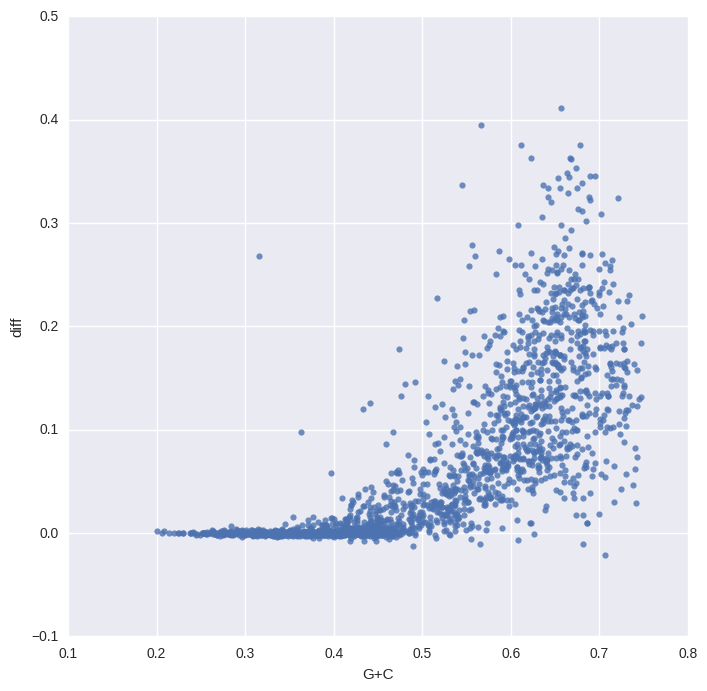

In [17]:
plt.figure(figsize=(8,8))
sns.regplot("G+C","diff",data=out_df,fit_reg=False)
plt.show()

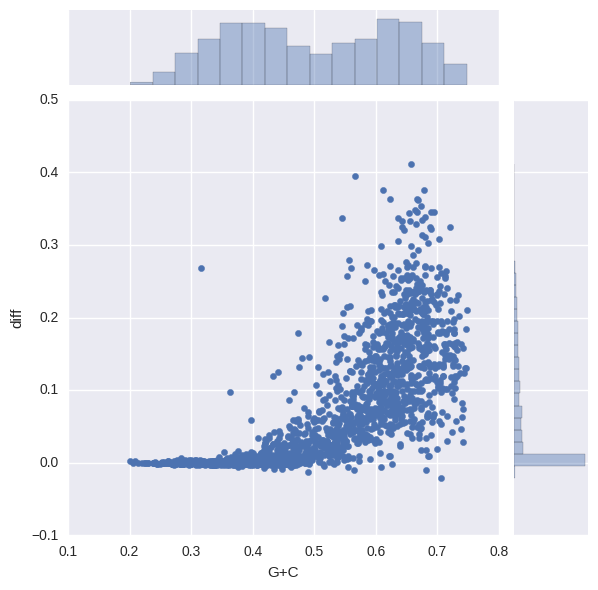

In [21]:
g=sns.jointplot("G+C", "diff", data=out_df,stat_func=None)
plt.show()

###  found strange bimodel of bacterial G+C...

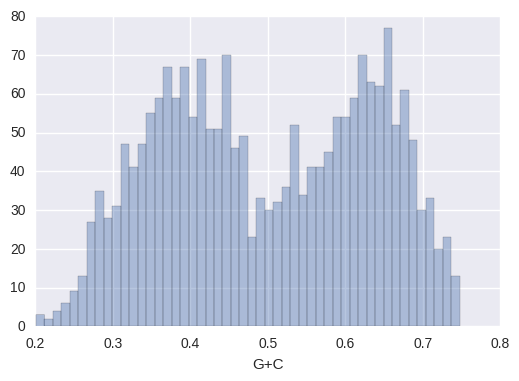

In [22]:
sns.distplot(out_df["G+C"], kde=False, bins =50)

## Pick species for genome browser

In [24]:
out_df[(out_df["G+C"]<0.4) & (out_df["diff"]>0.2)]

,taxid,count_real,count_sim,organism_name,ftp_basename,domain,genetic_code,G+C,diff
2018,908937,1.052894,0.785069,Prevotella dentalis DSM 3688,GCF_000242335.1_ASM24233v3,bacteria,11,0.315316,0.267826


In [25]:
out_df[(out_df["diff"]>0.37)]

,taxid,count_real,count_sim,organism_name,ftp_basename,domain,genetic_code,G+C,diff
955,322710,1.566322,1.154877,Azotobacter vinelandii DJ,GCF_000021045.1_ASM2104v1,bacteria,11,0.656755,0.411445
1003,28095,1.725587,1.349730,Burkholderia gladioli,GCF_000959725.1_ASM95972v1,bacteria,11,0.678557,0.375857
1004,28095,1.725587,1.349730,Burkholderia gladioli,GCF_000959725.1_ASM95972v1,bacteria,11,0.611083,0.375857
1337,679935,1.210287,0.815757,Alistipes finegoldii DSM 17242,GCF_000265365.1_ASM26536v1,bacteria,11,0.566457,0.394531
